In [1]:
import numpy as np
import matplotlib.pyplot as plt

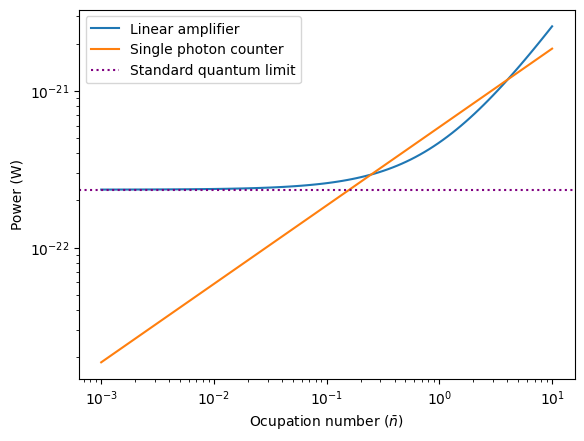

In [2]:
h = 6.626 *10**(-34) # Plank constant h
nu = 5 * 10**(9) # Hz
n = 0.1 # Photon ocupation number
Qc = 10**6
Qa = 10**6
Dnu = nu/Qa
t = 1 # seconds

# Create a log-spaced array from 10^0 to 10^3 (adjust the range as needed)
n = np.logspace(-3, 1, 100)
Pln = h*nu*(n+1)*np.sqrt(Dnu/t) # Linear amplifier
Pspc = h*nu*np.sqrt(n*2*np.pi*nu/t/Qc) # Single photon counter
Psql = h*nu*np.sqrt(Dnu/t) # Standard quantum limit


# Plot
plt.figure()
plt.plot(n,Pln, label='Linear amplifier')
plt.plot(n,Pspc, label = 'Single photon counter')
plt.axhline(Psql, color='purple', linestyle=':', label='Standard quantum limit')

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Ocupation number ($\bar{n}$)')
plt.ylabel('Power (W)')
plt.legend()

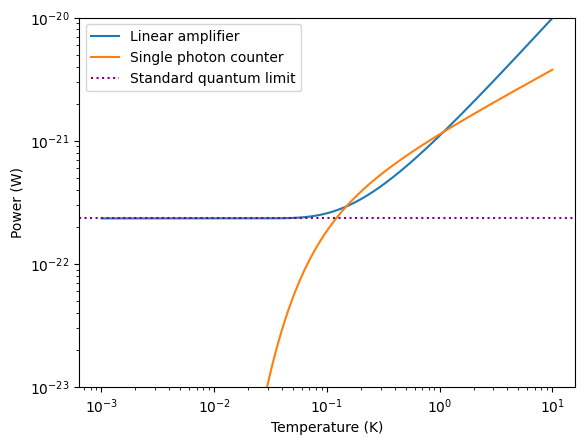

In [3]:
#In temperature units
kB = 1.380649 * 10**(-23)

T =  np.logspace(-3, 1, 301)
n = 1/(np.exp(h*nu/kB/T)-1)

Pln = h*nu*(n+1)*np.sqrt(Dnu/t) # Linear amplifier
Pspc = h*nu*np.sqrt(n*2*np.pi*nu/t/Qc) # Single photon counter
Psql = h*nu*np.sqrt(Dnu/t) # Standard quantum limit

# Plot
plt.figure()
plt.plot(T,Pln, label='Linear amplifier')
plt.plot(T,Pspc, label = 'Single photon counter')
plt.axhline(Psql, color='purple', linestyle=':', label='Standard quantum limit')

plt.ylim(10**(-23), 10**(-20))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Temperature (K)')
plt.ylabel('Power (W)')
plt.legend()

In [4]:
# Dark count rate conversion to power
#nu1Hz = 5*10**9 # Hz
# 1 Hz
P1Hz = h*nu
# 10 Hz
P10Hz = 10*h*nu
# 10 Hz
P80Hz = 80*h*nu
# 100 Hz
P100Hz = 100*h*nu

print("1 Hz: ", P1Hz)
print("10 Hz: ", P10Hz)
print("100 Hz: ", P100Hz)

1 Hz:  3.3129999999999996e-24
10 Hz:  3.3129999999999996e-23
100 Hz:  3.313e-22


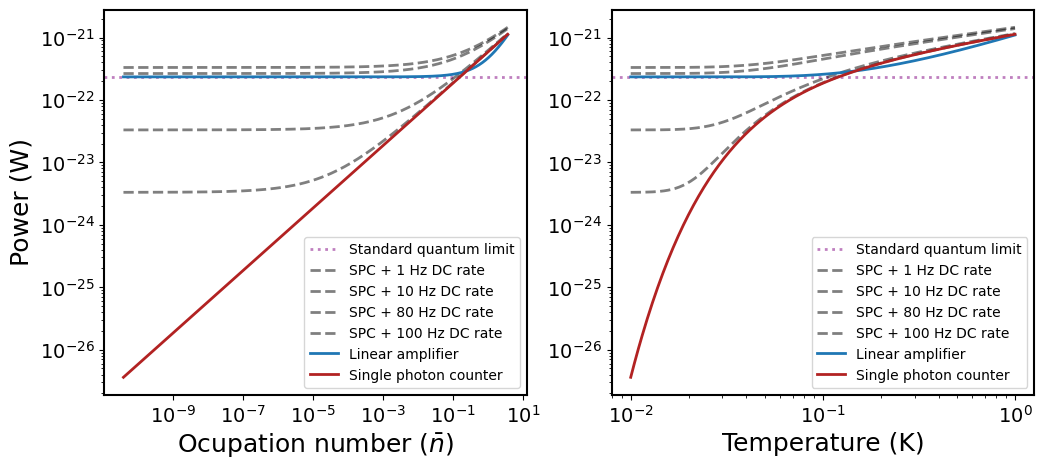

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1
n = np.logspace(-3, 1, 100)
Pln = h*nu*(n+1)*np.sqrt(Dnu/t) # Linear amplifier
Pspc = h*nu*np.sqrt(n*2*np.pi*nu/t/Qc) # Single photon counter
Psql = h*nu*np.sqrt(Dnu/t) # Standard quantum limit

# Plot 2
T =  np.logspace(-2, 0, 301)
n2 = 1/(np.exp(h*nu/kB/T)-1)

Pln2 = h*nu*(n2+1)*np.sqrt(Dnu/t) # Linear amplifier
Pspc2 = h*nu*np.sqrt(n2*2*np.pi*nu/t/Qc) # Single photon counter


# Plot
ax1.axhline(Psql, color='purple', linestyle=':', linewidth=2, label='Standard quantum limit', alpha=0.5)
ax1.plot(n2,Pspc2+P1Hz, color = 'black', linewidth=2, linestyle='--', alpha=0.5, label='SPC + 1 Hz DC rate')
ax1.plot(n2,Pspc2+P10Hz, color = 'black', linewidth=2, linestyle='--', alpha=0.5, label='SPC + 10 Hz DC rate')
ax1.plot(n2,Pspc2+P80Hz, color = 'black', linewidth=2, linestyle='--', alpha=0.5, label='SPC + 80 Hz DC rate')
ax1.plot(n2,Pspc2+P100Hz, color = 'black', linewidth=2, linestyle='--', alpha=0.5, label='SPC + 100 Hz DC rate')
ax1.plot(n2,Pln2,  linewidth=2, label='Linear amplifier')
ax1.plot(n2,Pspc2, color = "firebrick", linewidth=2, label = 'Single photon counter')

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'Ocupation number ($\bar{n}$)', size = 18)
ax1.set_ylabel('Power (W)', size = 18)
ax1.legend()

ax2.axhline(Psql, color='purple', linestyle=':', linewidth=2, label='Standard quantum limit', alpha=0.5)
ax2.plot(T,Pspc2+P1Hz, color = 'black', linewidth=2, linestyle='--', alpha=0.5, label='SPC + 1 Hz DC rate')
ax2.plot(T,Pspc2+P10Hz, color = 'black', linewidth=2, linestyle='--', alpha=0.5, label='SPC + 10 Hz DC rate')
ax2.plot(T,Pspc2+P80Hz, color = 'black', linewidth=2, linestyle='--', alpha=0.5, label='SPC + 80 Hz DC rate')
ax2.plot(T,Pspc2+P100Hz, color = 'black', linewidth=2, linestyle='--', alpha=0.5, label='SPC + 100 Hz DC rate')
ax2.plot(T,Pln2, linewidth=2, label='Linear amplifier')
ax2.plot(T,Pspc2, color = "firebrick", linewidth=2, label = 'Single photon counter')

#ax2.set_ylim(10**(-23), 10**(-20))
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel('Temperature (K)', size = 18)
#ax2.set_ylabel('Power (W)')
ax2.legend()

# Make all spines (borders) thicker
for spine in ax1.spines.values():
    spine.set_linewidth(1.5)  # Change thickness as needed
for spine in ax2.spines.values():
    spine.set_linewidth(1.5)  # Change thickness as needed
ax1.tick_params(axis='both', labelsize=14)
ax2.tick_params(axis='both', labelsize=14)